Copyright **`(c)`** 2023 Antonio Ferrigno `<s316467@polito.it>`  
[`https://github.com/s316467/Computational-Intelligence-23-24/tree/main`](https://github.com/s316467/Computational-Intelligence-23-24/tree/main)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/s316467/Computational-Intelligence-23-24/tree/main/LICENSE.md) for details.

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [57]:
from random import choices, random, randint, sample
import matplotlib.pyplot as plt
import numpy as np
import itertools
import lab2_lib

In [58]:
# Function to create a specific problem instance
def create_problem_instance(instance_number):
    return lab2_lib.make_problem(instance_number)

In [59]:
# Initialize a population of genomes
def initialize_population(size, length):
    return [choices([0, 1], k=length) for _ in range(size)]

# Tournament selection
def tournament_selection(population, fitnesses, tournament_size=3):
    selected = []
    for _ in range(2):
        tournament = sample(list(zip(population, fitnesses)), tournament_size)
        selected.append(max(tournament, key=lambda x: x[1])[0])
    return selected

# Perform crossover between two parents
def crossover(parent1, parent2, crossover_rate):
    if random() < crossover_rate:
        crossover_point = int(0.2 * len(parent1))
        child = parent1[:crossover_point] + parent2[crossover_point:]
        return child
    else:
        return parent1

# Mutate a genome
def mutate(genome, mutation_rate):
    for i in range(len(genome)):
        if random() < mutation_rate:
            genome[i] = 1 - genome[i]
    return genome

# Improved tournament selection
def tournament_selection(population, fitnesses, tournament_size):
    selected = []
    for _ in range(2):
        tournament_indices = np.random.choice(len(population), tournament_size, replace=False)
        tournament = [(population[i], fitnesses[i]) for i in tournament_indices]
        selected.append(max(tournament, key=lambda x: x[1])[0])
    return selected

# Elitism
def elitism(population, fitnesses, elite_size=2):
    sorted_population = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
    return [individual for individual, _ in sorted_population[:elite_size]]

def plot_fitness_over_generations(best_fitness_history):
    plt.plot(best_fitness_history)
    plt.title("Best Fitness over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.grid(True)
    plt.show()

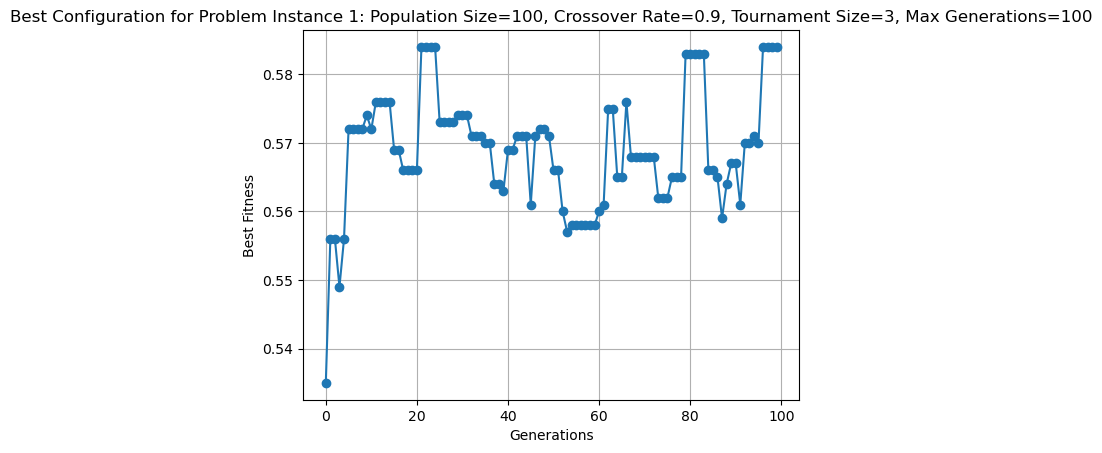

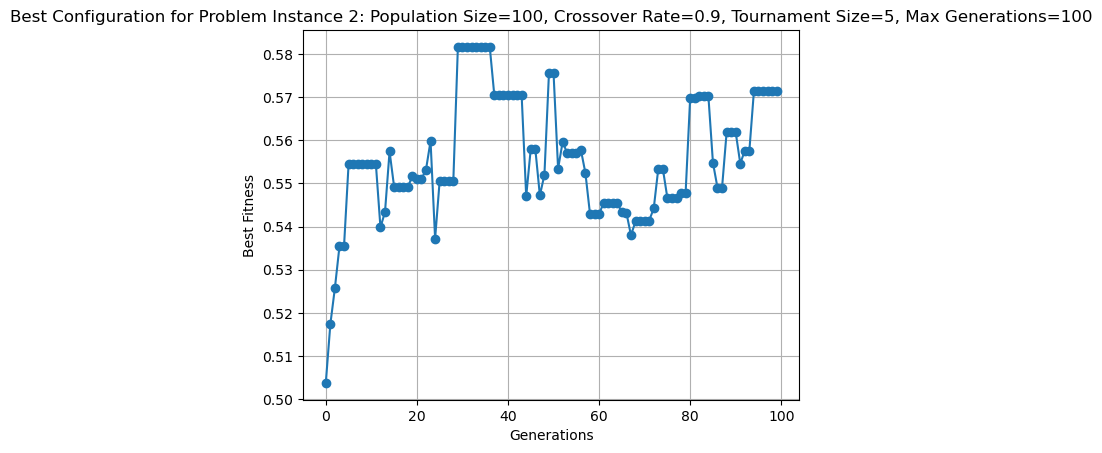

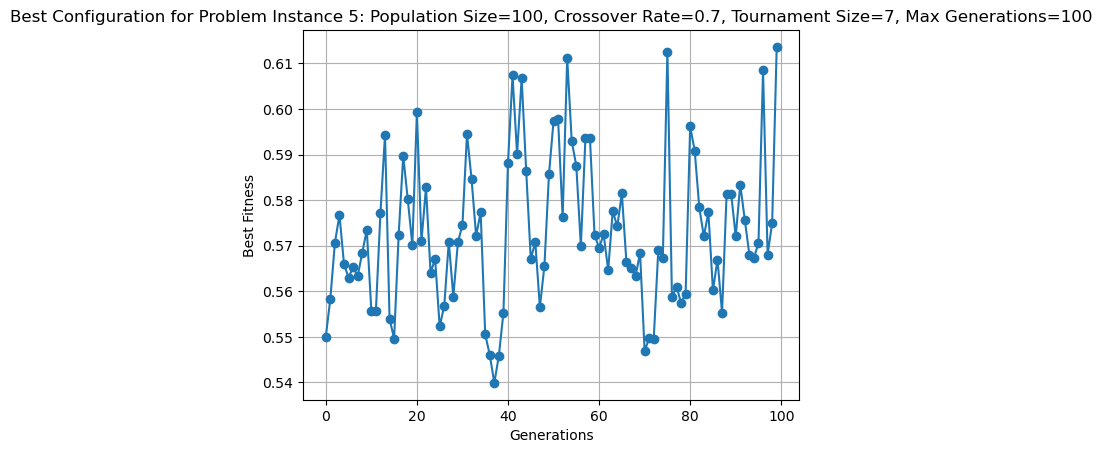

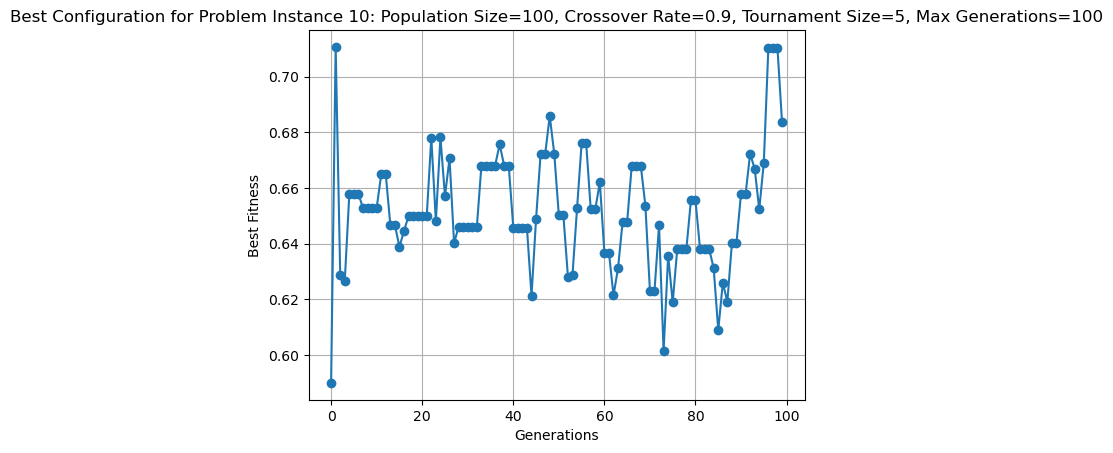

In [60]:
# Parameters
genome_length = 1000

# Parameter ranges
problem_instances = [1, 2, 5, 10]
max_generations = [10, 50, 100] # Other iterations number are too long to run
population_sizes = [50, 100] # [50, 100, 200, 500] # unuseful most of the times trying with other settings
crossover_rates = [0.5, 0.7, 0.9]
tournament_sizes = [3, 5, 7]
mutation_rate = 0.15

# Record keeping
best_fitness_per_instance_and_combination = {}
fitness_history_per_combination = {}
# Initialize a dictionary to store the highest fitness and configuration for each problem instance
highest_fitness_per_instance = {}

# Iterate over all combinations of parameters
for problem_instance_number in problem_instances:
    # Initialize the highest fitness for this problem instance
    highest_fitness_per_instance[problem_instance_number] = (0, None)
    fitness = create_problem_instance(problem_instance_number)
    
    for params in itertools.product(population_sizes, crossover_rates, tournament_sizes, max_generations):
        population_size, crossover_rate, tournament_size, max_generation = params
        best_fitness_history = []
        
            
        # Main Evolutionary Algorithm
        population = initialize_population(population_size, genome_length)
        
        # Used to understand if code is working correctly
        # print(f"Initialized population for problem instance {problem_instance_number} with size {population_size}.")
        previous_population = []
        fitness_cache = {}

        best_fitness_history = []

        for generation in range(max_generation):
            fitness_values = []
            for individual in population:
                key = tuple(individual)
                if key not in fitness_cache:
                    fitness_cache[key] = fitness(individual)
                fitness_values.append(fitness_cache[key])

            elite = elitism(population, fitness_values)
            new_population = elite.copy()

            while len(new_population) < population_size:
                parent1, parent2 = tournament_selection(population, fitness_values, tournament_size)
                child = crossover(parent1, parent2, crossover_rate)
                child = mutate(child, mutation_rate)
                new_population.extend([child])

            population = new_population[:population_size]
            best_fitness = max(fitness_values)
            best_genome = population[fitness_values.index(best_fitness)]
            # print("Best Genome:", best_genome) # may be too long to print
            # print("Best Fitness:", best_fitness)
            # print("Total Fitness Calls:", fitness.calls) # better showing with graphs
            key = (population_size, crossover_rate, mutation_rate, tournament_size, max_generation)
            best_fitness_history.append(best_fitness)

            # Optional: Print best fitness in each generation
            # print(f"Generation {generation}: Best Fitness = {best_fitness}")
            
            # Used to understand if code is working correctly
            # print(f"Completed generation {generation} for problem instance {problem_instance_number}, best fitness: {best_fitness}")
                
        key = (problem_instance_number,) + params
        fitness_history_per_combination[key] = best_fitness_history
        best_fitness_per_instance_and_combination[key] = best_fitness
        # Update the highest fitness for the problem instance if a new highest is found
        if best_fitness > highest_fitness_per_instance[problem_instance_number][0]:
            highest_fitness_per_instance[problem_instance_number] = (best_fitness, (problem_instance_number,) + params)
    
    # Initially done with a single parameters configuration run 
    # plot_fitness_over_generations(best_fitness_history)

"""
# Plotting the results for each parameter combination
for key, avg_fitness_history in fitness_history_per_combination.items():
    problem_instance_number, population_size, crossover_rate, tournament_size, max_generation = key
    plt.figure()
    plt.plot(range(max_generation), avg_fitness_history, marker='o')
    title = f"Problem Instance {problem_instance_number}, Population Size={population_size}, Crossover Rate={crossover_rate}, Tournament Size={tournament_size}, Max Generations={max_generation}"
    plt.title(title)
    plt.xlabel("Generations")
    plt.ylabel("Best Fitness")
    plt.grid(True)
    plt.show()
    
# Plotting the results for each problem instance
for problem_instance_number in problem_instances:
    for params in itertools.product(population_sizes, crossover_rates, tournament_sizes):
        # Prepare data for plotting
        fitness_values = []
        for max_generation in max_generations:
            key = (problem_instance_number,) + params + (max_generation,)
            fitness_values.append(best_fitness_per_instance_and_combination[key])

        # Plot the graph for this combination of parameters and problem instance
        plt.figure()
        plt.plot(max_generations, fitness_values, marker='o')
        title = f"Problem Instance {problem_instance_number}, Population Size={params[0]}, Crossover Rate={params[1]}, Tournament Size={params[2]}"
        plt.title(title)
        plt.xlabel("Max Generations")
        plt.ylabel("Best Fitness")
        plt.grid(True)
        plt.show()
"""
# Plotting the highest fitness for each problem instance
for problem_instance_number in problem_instances:
    highest_fitness, configuration = highest_fitness_per_instance[problem_instance_number]
    if configuration:
        plt.figure()
        plt.plot(range(configuration[-1]), fitness_history_per_combination[configuration], marker='o')
        title = f"Best Configuration for Problem Instance {problem_instance_number}: Population Size={configuration[1]}, Crossover Rate={configuration[2]}, Tournament Size={configuration[3]}, Max Generations={configuration[4]}"
        plt.title(title)
        plt.xlabel("Generations")
        plt.ylabel("Best Fitness")
        plt.grid(True)
        plt.show()